# Chapter 4 - Multivariate Statistics

Multivariate statistics includes all statistical techniques for analyzing samples made of two or
more variables. The data set (a 𝑁 × 𝑃 matrix X) is a collection of 𝑁 independent samples
column vectors [x1, . . . , x𝑖, . . . , x𝑁] of length 𝑃.

$$
X = 
\begin{bmatrix}
\mathbf{x}_1^\top \\
\mathbf{x}_2^\top \\
\vdots \\
\mathbf{x}_i^\top \\
\vdots \\
\mathbf{x}_N^\top
\end{bmatrix}
=
\begin{bmatrix}
x_{11} & \cdots & x_{1j} & \cdots & x_{1P} \\
\vdots & & \vdots & & \vdots \\
x_{i1} & \cdots & x_{ij} & \cdots & x_{iP} \\
\vdots & & \vdots & & \vdots \\
x_{N1} & \cdots & x_{Nj} & \cdots & x_{NP}
\end{bmatrix}
$$


In [25]:
import numpy as np
import pandas as pd

import scipy

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Covariance Matrix

In [51]:
import numpy as np                             # Importing numpy for numerical operations
import matplotlib.pyplot as plt                # Importing matplotlib for plotting
from sklearn.mixture import GaussianMixture    # Importing Gaussian Mixture Model from scikit-learn
from matplotlib.patches import Ellipse         # Importing Ellipse to draw covariance ellipses
import seaborn as sns                          # Importing seaborn for setting the plot style

In [55]:
###### The DataSet ######

np.random.seed(42)                   # Set seed for reproducibility
colors = sns.color_palette('muted')  # Use a muted color palette from seaborn
n_samples = 100                      # Number of samples for each cluster

# Initialize arrays for means and covariance matrices
mean = [None] * 4
Cov = [None] * 4
X = []  # Empty list to hold the generated dataset


# Define the means and covariance matrices for four Gaussian distributions
mean[0] = np.array([-2.5, 2.5])
Cov[0] = np.array([[1, 0], [0, 1]])
mean[1] = np.array([2.5, 2.5])
Cov[1] = np.array([[1, .5], [.5, 1]])
mean[2] = np.array([-2.5, -2.5])
Cov[2] = np.array([[1, .9], [.9, 1]])
mean[3] = np.array([2.5, -2.5])
Cov[3] = np.array([[1, -.9], [-.9, 1]])

# Generate dataset for each of the four distributions
for i in range(len(mean)):
    X.append(np.random.multivariate_normal(mean[i], Cov[i], n_samples))  # Append generated samples to X
    
X = np.vstack(X)    # Combine the data into one numpy array for GMM

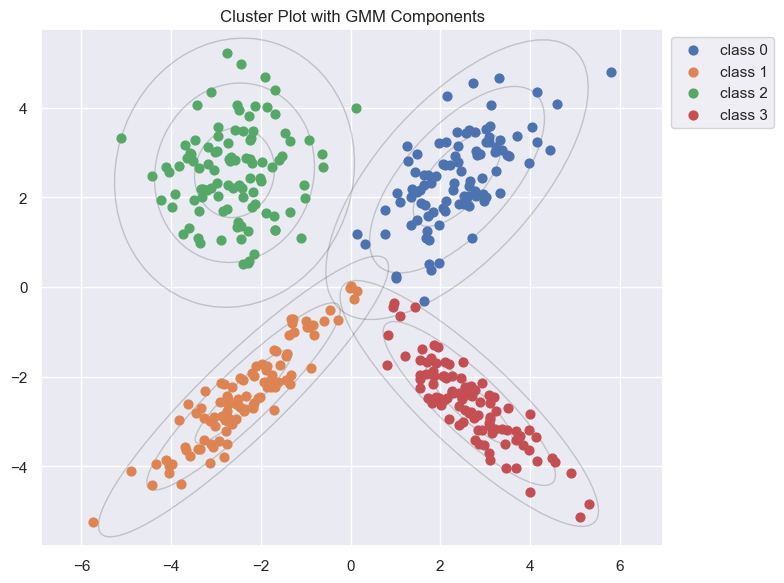

In [57]:
###### Functions ######

# Function to draw ellipses representing Gaussian components
def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()  # Get the current axis or use the provided one
    
    # Calculate eigenvalues and eigenvectors for the covariance matrix
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)              # Perform Singular Value Decomposition
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))  # Calculate the angle of rotation
        width, height = 2 * np.sqrt(s)                    # Calculate the width and height of the ellipse
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw ellipses for 1, 2, and 3 standard deviations
    for nsig in range(1, 4):
        ell = Ellipse(position, nsig * width, nsig * height, angle=angle, **kwargs)  # Create an ellipse
        ax.add_patch(ell)                                                            # Add the ellipse to the plot

# Plot GMM model and the Gaussian components
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()  # Get the current axis or use the provided one
    labels = gmm.fit(X).predict(X)  # Fit the GMM model to the data and predict the labels for each sample
    
    # Scatter plot with class labels
    for i in np.unique(labels):  # Iterate through each class
        ax.scatter(X[labels == i, 0], X[labels == i, 1], s=40, cmap='viridis', zorder=2, label=f'class {i}')  # Plot points with different colors
    
    ax.axis('equal')  # Set equal scaling for both axes
    
    # Draw ellipses representing each Gaussian component
    w_factor = 0.2 / gmm.weights_.max()     # Adjust the transparency of the ellipses based on the component weights
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor, edgecolor='k', facecolor='none')  # Draw ellipses with adjusted transparency

# Set the desired style using Seaborn
sns.set(style="darkgrid") 

# Create and fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)  # Create a GMM with 4 components

# Plot the results
plt.figure(figsize=(8, 6))                     # Create a figure with a specific size
plot_gmm(gmm, X)                               # Call the plot_gmm function to plot the data and GMM components
plt.title("Cluster Plot with GMM Components")  # Add a title to the plot

# Move the legend to the upper left but outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Position the legend outside the plot in the upper left corner
plt.tight_layout()                                   # Adjust the layout to make room for the legend
plt.show()                                           # Display the plot

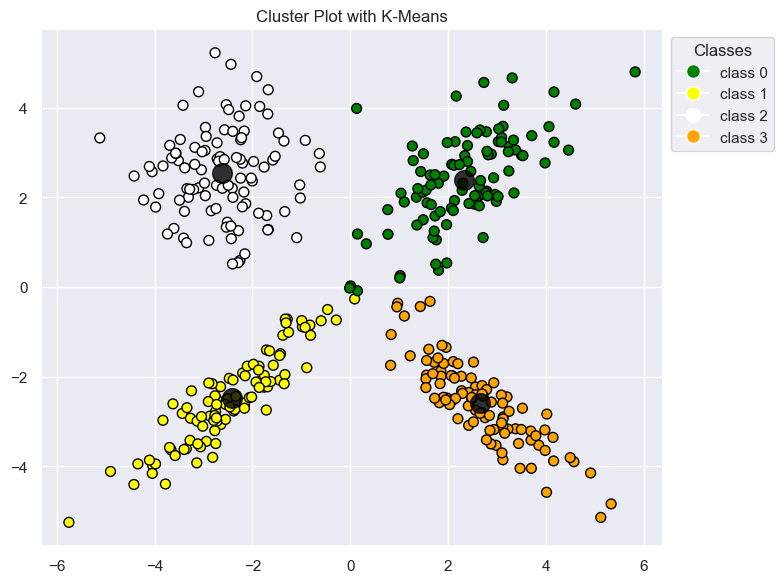

In [75]:
from sklearn.cluster import KMeans
import matplotlib.colors as mcolors

colors = ['green', 'yellow', 'white', 'orange']   # Define colors
cmap_name = 'custom_black_white_vivid'            # Custom colormap name
custom_cmap = mcolors.ListedColormap(colors)      # Create the colormap

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Create a figure with a larger size (8x6)
plt.figure(figsize=(8, 6))

# Plot the data points, coloring them by their cluster assignment (dots used)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap=custom_cmap, edgecolor='black', marker='o')

# Extract the cluster centers from the KMeans model
centers = kmeans.cluster_centers_

# Plot the cluster centers (black dots)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.8, marker='o')

# Add legend outside the plot (upper left corner)
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=custom_cmap(i), markersize=10, label=f'class {i}') for i in range(4)]
plt.legend(handles=handles, loc='upper left', bbox_to_anchor=(1, 1), title='Classes')

# Show the plot with the custom size
plt.title("Cluster Plot with K-Means")
plt.tight_layout()  # Adjust layout to make space for legend
plt.show()

## Correlation Matrix

In [77]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('data/mtcars.csv')

# Display the first few rows of the DataFrame
df.head()

,Model,MPG,Cylinders,Displacement,Horsepower,Rear_Axle_Ratio,Weight (000),Qtr_Mile_Time,Engine_Shape,Transmission,Fwd_Gears,Carburators
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


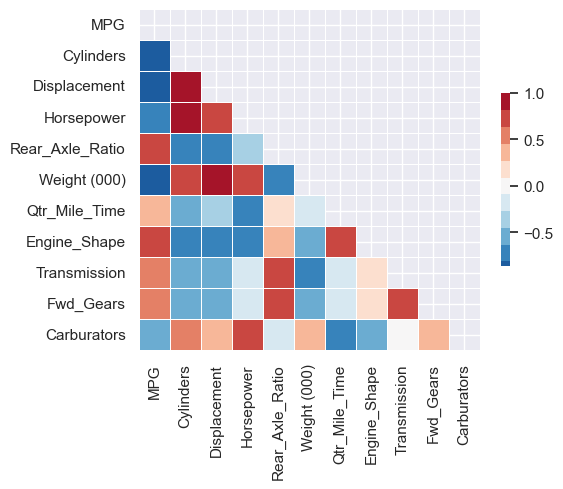

In [89]:
# Drop non-numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Compute the correlation matrix for numeric columns only
corr = df_numeric.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5.5, 4.5))

# Define the colormap
cmap = sns.color_palette("RdBu_r", 11)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,                       # Plot the correlation matrix as a heatmap
            mask=mask,                  # Apply the mask to hide the upper triangle
            cmap=cmap,                  # Use the specified colormap ("RdBu_r") for color mapping
            vmax=1,                     # Set the maximum value for the colormap scale to 1
            center=0,                   # Center the colormap at 0, so colors represent positive and negative correlations equally
            square=True,                # Ensure that each cell in the heatmap is square-shaped
            linewidths=.5,              # Set the width of the lines between the heatmap cells to 0.5
            cbar_kws={"shrink": .5})    # Shrink the color bar to 50% of its default size

plt.show()

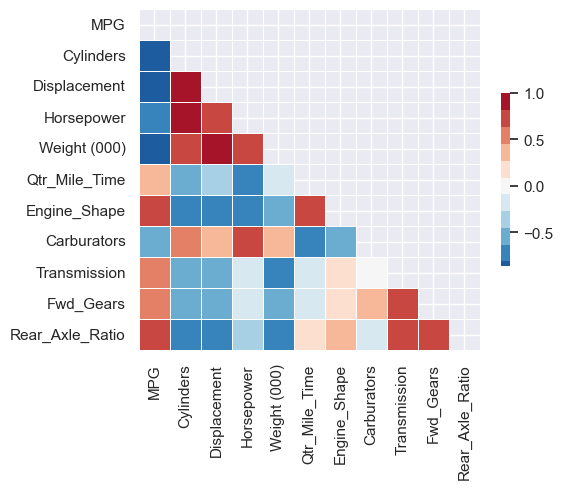

In [87]:
from sklearn.cluster import AgglomerativeClustering

# Drop non-numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Compute the correlation matrix for numeric columns
corr = df_numeric.corr()

# Convert correlation to distances (for clustering)
d = 2 * (1 - np.abs(corr))

# Apply Agglomerative Clustering with precomputed distances
clustering = AgglomerativeClustering(n_clusters=3, linkage='single', metric="precomputed").fit(d)

# Reorder the columns based on the clustering labels
clusters = [list(corr.columns[clustering.labels_ == lab]) for lab in set(clustering.labels_)]
reordered = np.concatenate(clusters)

# Re-order the correlation matrix
R = corr.loc[reordered, reordered]

# Generate a mask for the upper triangle
mask = np.zeros_like(R, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5.5, 4.5))

# Define the colormap
cmap = sns.color_palette("RdBu_r", 11)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(R, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()